In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
arquivo['color'] = arquivo['color'].replace('red', 0)
arquivo['color'] = arquivo['color'].replace('white', 1)

In [4]:
import numpy as np
arquivo['worst'] = np.where(arquivo['quality'] >= 7, 0, 1)

In [5]:
arquivo = arquivo.drop(['quality'], axis=1)

#arquivo = arquivo.drop(['color', 'quality'], axis=1)

#arquivo = arquivo.drop(['alcohol'], axis=1)

#arquivo = arquivo.drop(['free sulfur dioxide'], axis=1)

#arquivo = arquivo.drop(['density'], axis=1)

#arquivo = arquivo.drop(['alcohol', free sulfur dioxide', total sulfur dioxide'], axis=1)

arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


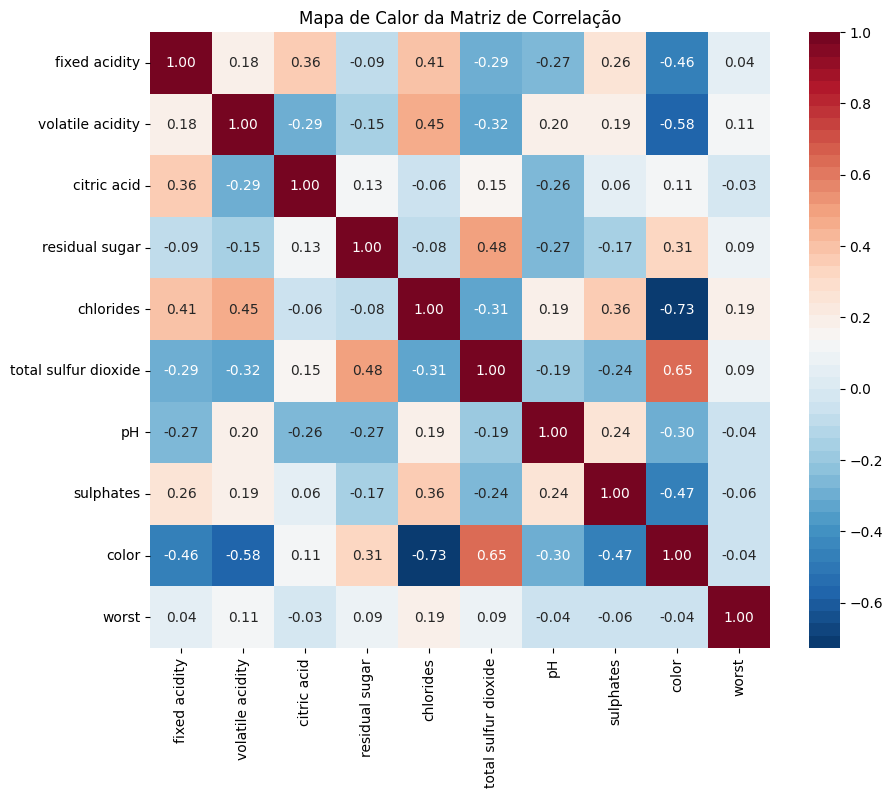

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação para as colunas numéricas do DataFrame
corr = arquivo.select_dtypes('number').corr()

# Personalizar a paleta de cores (opcional)
custom_palette = sns.color_palette("RdBu_r", n_colors=50)

# Plotar o mapa de calor usando o Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=custom_palette, fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()


In [33]:
# Calcular a matriz de correlação
correlation_matrix = arquivo.corr()

# Selecionar as correlações com a variável alvo ('quality')
correlation_with_target = correlation_matrix['worst']

# Excluir a correlação da variável alvo consigo mesma
correlation_with_target = correlation_with_target.drop('worst')

# Exibir os valores de correlação e nomes das variáveis preditoras
#print("Correlação com a variável alvo (worst):\n")
#print(correlation_with_target)

# Ordenar os valores de correlação em ordem decrescente
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Exibir os valores de correlação e nomes das variáveis preditoras ordenados
print("Correlação com a variável alvo (worst) - Ordenado:\n")
print(correlation_with_target_sorted)

Correlação com a variável alvo (worst) - Ordenado:

chlorides               0.192384
volatile acidity        0.109065
total sulfur dioxide    0.093249
residual sugar          0.089479
fixed acidity           0.039826
citric acid            -0.026899
pH                     -0.045772
color                  -0.046083
sulphates              -0.063683
Name: worst, dtype: float64


In [ ]:
# Converter a coluna 'worst' para o tipo de dados desejado (por exemplo, int)
arquivo['worst'] = arquivo['worst'].astype(int)

# Verificar o tipo de dados da coluna 'worst' após a conversão
print(arquivo['worst'].dtype)

int64


In [ ]:
# Informações gerais sobre o dataset
print(arquivo.info())

# Descrição estatística das variáveis numéricas
print(arquivo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        6497 non-null   float64
 1   volatile acidity     6497 non-null   float64
 2   citric acid          6497 non-null   float64
 3   residual sugar       6497 non-null   float64
 4   chlorides            6497 non-null   float64
 5   free sulfur dioxide  6497 non-null   float64
 6   density              6497 non-null   float64
 7   pH                   6497 non-null   float64
 8   sulphates            6497 non-null   float64
 9   worst                6497 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 507.7 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434   

In [35]:
print(arquivo['worst'].value_counts())

worst
1    4522
0    1230
Name: count, dtype: int64


In [34]:
# Exibir o percentual de cada classe
print(arquivo['worst'].value_counts(normalize=True) * 100)

worst
1    78.616134
0    21.383866
Name: proportion, dtype: float64


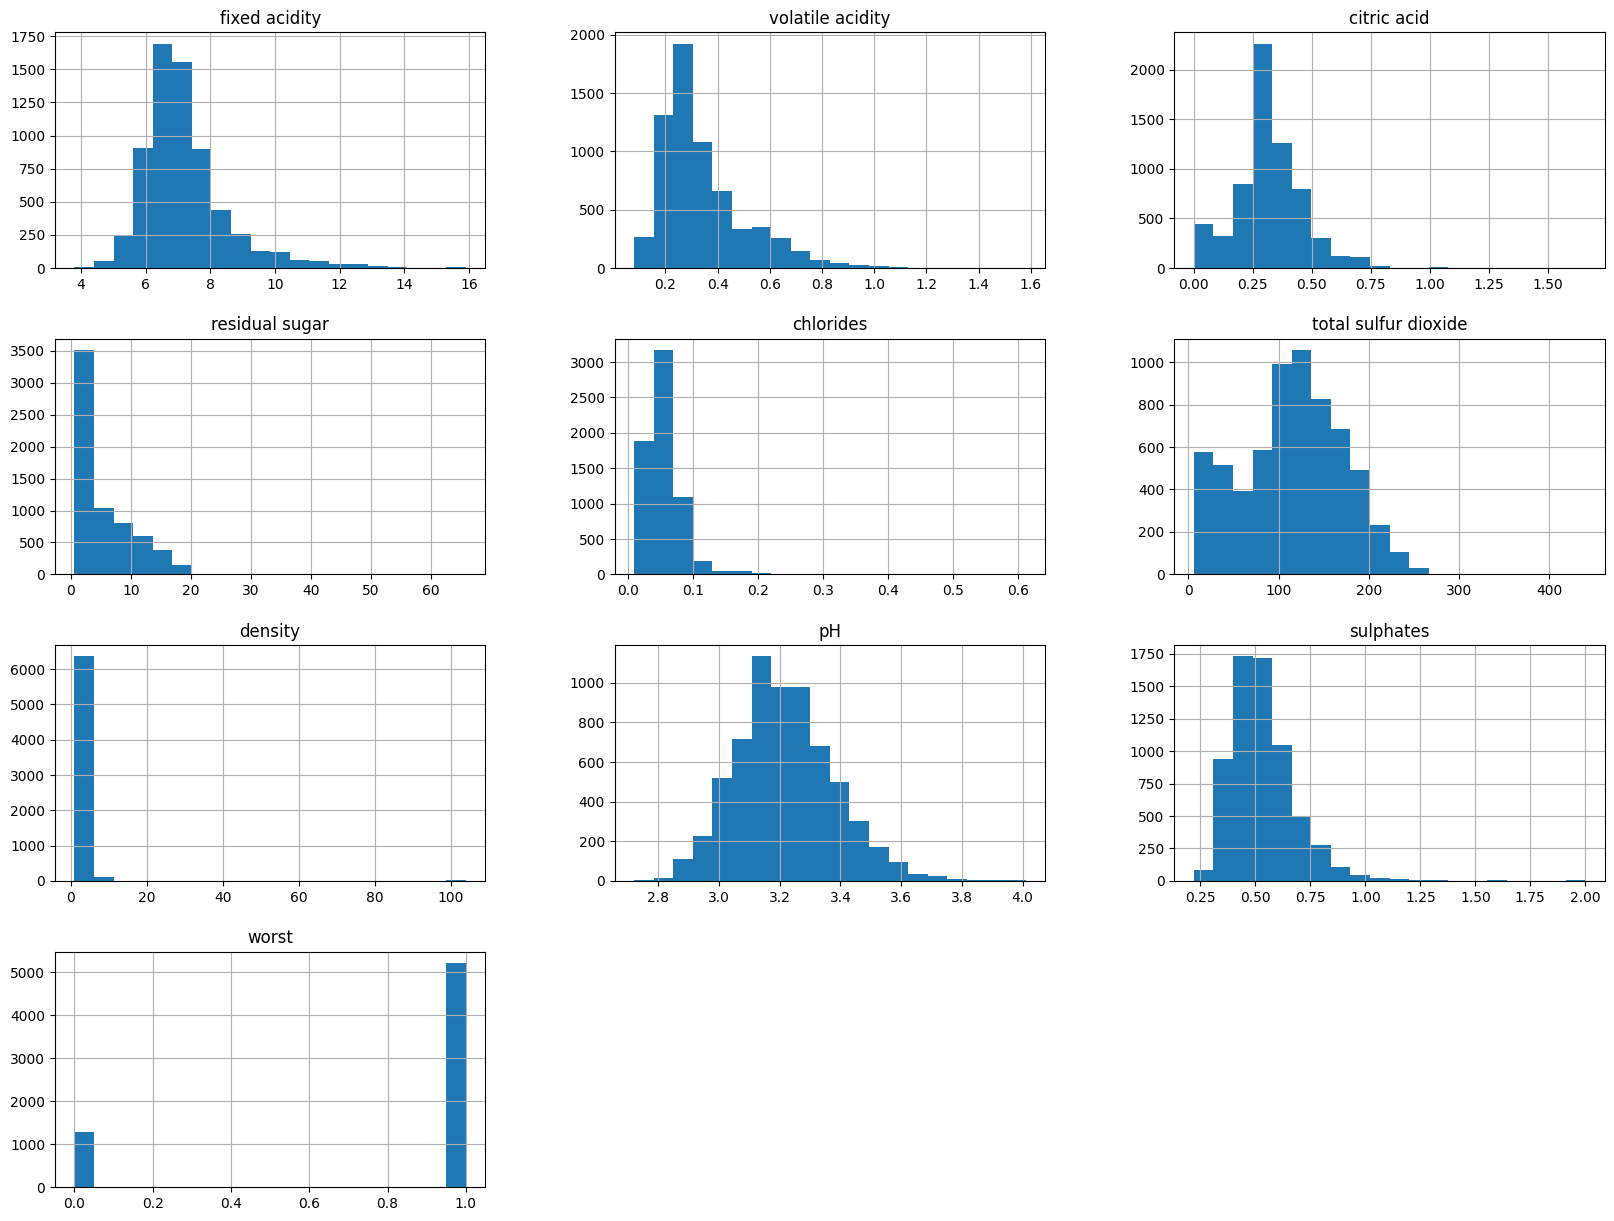

In [ ]:
import matplotlib.pyplot as plt
arquivo.hist(figsize=(20, 15), bins=20)
plt.show()

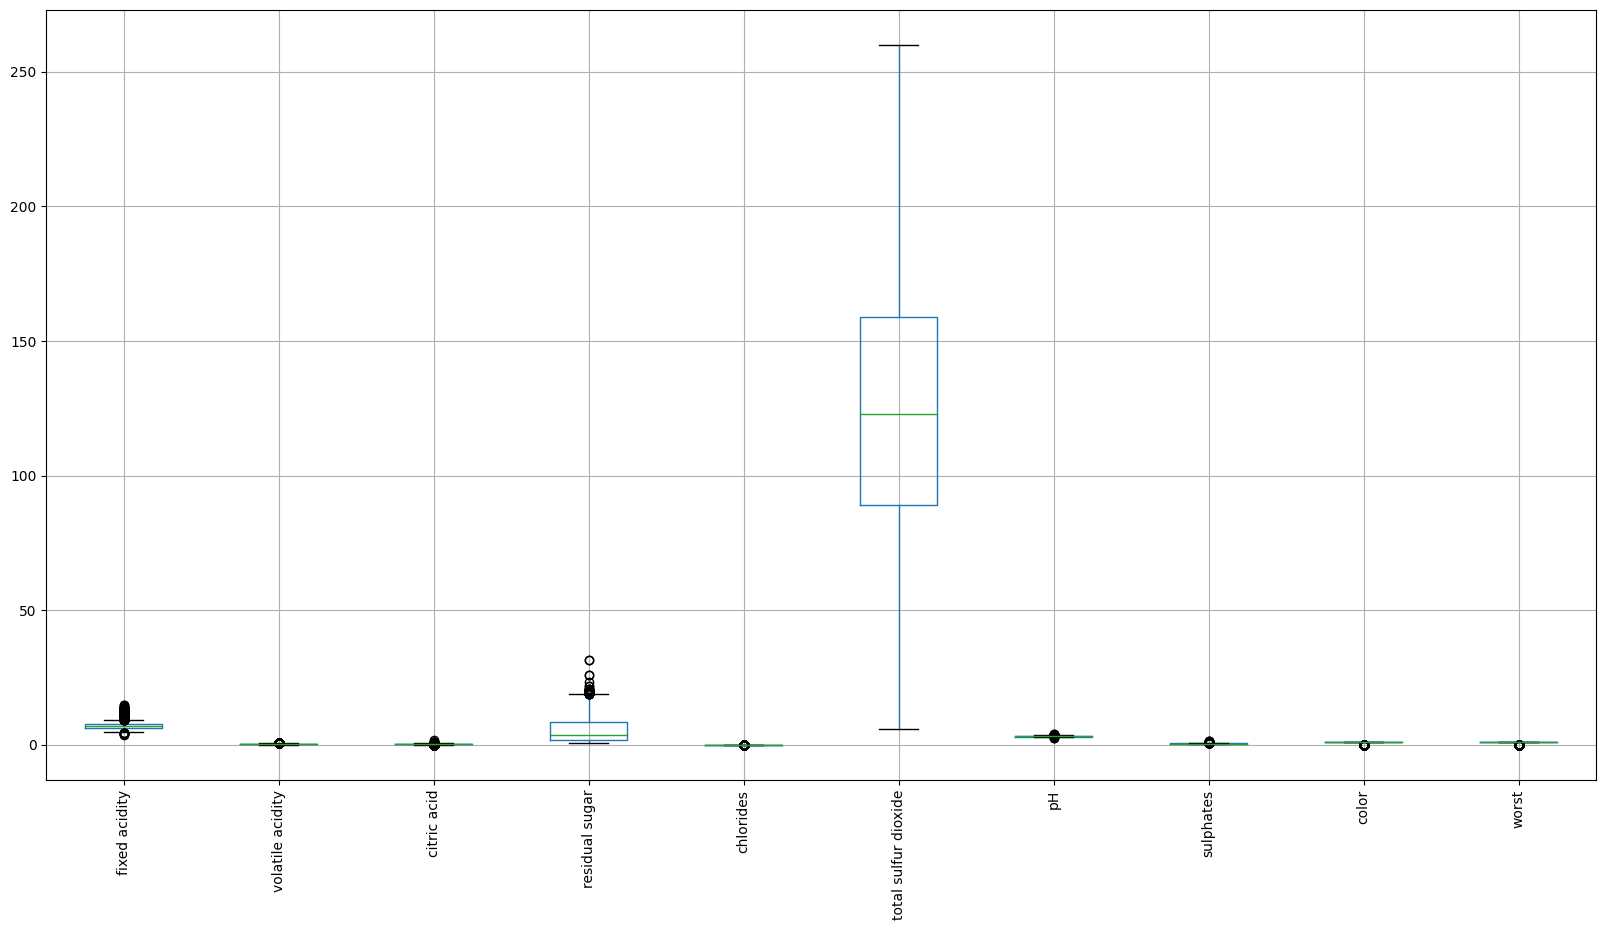

In [32]:
arquivo.boxplot(figsize=(20, 10), rot=90)
plt.show()

In [ ]:
# Check if 'color column exists in the DataFrame
if 'color' in arquivo.columns:
    print("Column 'color' exists in the DataFrame.")
    # Replace 'red' with 0 and 'white' with 1
    arquivo['color'] = arquivo['color'].replace('red', 0)
    arquivo['color'] = arquivo['color'].replace('white', 1)
else:
    print("Column 'color' does not exist in the DataFrame.")

# Display the first few rows of the DataFrame
print(arquivo.head())

Column 'color' does not exist in the DataFrame.
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   total sulfur dioxide  density    pH  sulphates  worst  
0                 170.0   1.0010  3.00       0.45      1  
1                 132.0   0.9940  3.30       0.49      1  
2                  97.0   0.9951  3.26       0.44      1  
3                 186.0   0.9956  3.19       0.40      1  
4                 186.0   0.9956  3.19       0.40      1  


In [ ]:
import numpy as np
arquivo['worst'] = np.where(arquivo['quality'] >= 7, 0, 1)

In [23]:
arquivo = arquivo.drop('alcohol', axis = 1)
arquivo = arquivo.drop('density', axis = 1)
arquivo = arquivo.drop('free sulfur dioxide', axis = 1)

#arquivo = arquivo.drop('color', axis = 1)
#arquivo = arquivo.drop('quality', axis = 1)


#arquivo = arquivo.drop('citric acid', axis = 1)

#arquivo = arquivo.drop('pH', axis = 1)
#arquivo = arquivo.drop('sulphates', axis = 1)

#arquivo = arquivo.drop(['free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color', 'quality'], axis=1)
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,color,worst
0,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,1,1
1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,1,1
2,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,1,1
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,1,1
4,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,1,1


In [ ]:
# Importar Pandas
import pandas as pd

# Calcular o Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna 'residual sugar'
Q1 = arquivo['residual sugar'].quantile(0.25)
Q3 = arquivo['residual sugar'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers residual sugar
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Remover outliers das colunas, exceto 'residual sugar	'
arquivo = arquivo[(arquivo['residual sugar'] >= lim_inf) & (arquivo['residual sugar'] <= lim_sup)]

# Exibir as primeiras linhas do DataFrame sem outliers volatile acidity
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,worst
1,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,1
2,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,1
3,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,1
4,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,1
5,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,1


In [ ]:
# Importar Pandas
import pandas as pd

# Calcular o Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna 'fixed acidity'
Q1 = arquivo['fixed acidity'].quantile(0.25)
Q3 = arquivo['fixed acidity'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers fixed acidity
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Remover outliers das colunas, exceto 'fixed acidity'
arquivo = arquivo[(arquivo['fixed acidity'] >= lim_inf) & (arquivo['fixed acidity'] <= lim_sup)]

# Exibir as primeiras linhas do DataFrame sem outliers fixed acidity
arquivo.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,worst


In [18]:
# Importar Pandas
import pandas as pd

# Calcular o Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna 'volatile acidity'
Q1 = arquivo['volatile acidity'].quantile(0.25)
Q3 = arquivo['volatile acidity'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers volatile acidity
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Remover outliers das colunas, exceto 'volatile acidity'
arquivo = arquivo[(arquivo['volatile acidity'] >= lim_inf) & (arquivo['volatile acidity'] <= lim_sup)]

# Exibir as primeiras linhas do DataFrame sem outliers volatile acidity
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [19]:
# Importar Pandas
import pandas as pd

# Calcular o Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna 'chlorides'
Q1 = arquivo['chlorides'].quantile(0.25)
Q3 = arquivo['chlorides'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers chlorides
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Remover outliers das colunas, exceto 'chlorides'
arquivo = arquivo[(arquivo['chlorides'] >= lim_inf) & (arquivo['chlorides'] <= lim_sup)]

# Exibir as primeiras linhas do DataFrame sem outliers chlorides
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [29]:
# Importar Pandas
import pandas as pd

# Calcular o Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna 'total sulfur dioxide'
Q1 = arquivo['total sulfur dioxide'].quantile(0.25)
Q3 = arquivo['total sulfur dioxide'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers na coluna 'total sulfur dioxide'
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Remover outliers das colunas, exceto 'alcohol'
arquivo = arquivo[(arquivo['total sulfur dioxide'] >= lim_inf) & (arquivo['total sulfur dioxide'] <= lim_sup)]

# Exibir as primeiras linhas do DataFrame sem outliers para a coluna 'total sulfur dioxide'
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,color,worst
0,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,1,1
1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,1,1
2,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,1,1
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,1,1
4,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,1,1


In [ ]:
# Importar Pandas
import pandas as pd

# Calcular o Q1 (primeiro quartil) e Q3 (terceiro quartil) para a coluna 'free sulfur dioxide'
Q1 = arquivo['free sulfur dioxide'].quantile(0.25)
Q3 = arquivo['free sulfur dioxide'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers na coluna 'free sulfur dioxide'
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Remover outliers das colunas, exceto 'alcohol'
arquivo = arquivo[(arquivo['free sulfur dioxide'] >= lim_inf) & (arquivo['free sulfur dioxide'] <= lim_sup)]

# Exibir as primeiras linhas do DataFrame sem outliers para a coluna 'free sulfur dioxide'
arquivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,1


In [ ]:
arquivo_no_outliers = arquivo_no_outliers.drop('quality', axis = 1)
arquivo_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [6]:
y = arquivo['worst']
X = arquivo.drop('worst',axis = 1)

#y = arquivo_no_outliers['worst']
#X = arquivo_no_outliers.drop('worst', axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

# Assuming x is your feature set and y is the target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=50, max_depth=20, min_samples_leaf=1, min_samples_split=2, max_features="sqrt", class_weight="balanced", random_state=42) #Hiperparam
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Definir o modelo ExtraTreesClassifier com balanceamento de classe
modelo = ExtraTreesClassifier(class_weight='balanced')

# Treinar o modelo com os dados de treinamento
modelo.fit(x_train, y_train)

# Fazer previsões com o modelo balanceado
y_pred = modelo.predict(x_test)

In [84]:
# Definir os pesos das classes manualmente
class_weights = {0: 0.33, 1: 0.67}  # Por exemplo, atribuindo mais peso à classe 1

# Definir o modelo ExtraTreesClassifier com pesos de classe personalizados
modelo = ExtraTreesClassifier(class_weight=class_weights)

# Treinar o modelo com os dados de treinamento
modelo.fit(x_train, y_train)

# Fazer previsões com o modelo com pesos de classe personalizados
y_pred = modelo.predict(x_test)


In [96]:
from sklearn.ensemble import ExtraTreesClassifier

class_weights = {0: 0.5, 1: 0.5}  # Por exemplo, atribuindo mais peso à classe 1

modelo = ExtraTreesClassifier(n_estimators=50, max_depth=18, min_samples_leaf=1, min_samples_split=2, max_features="sqrt", random_state=42) #Hiperparam
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Criar o objeto RandomUnderSampler
under_sampler = RandomUnderSampler()

# Aplicar a subamostragem aos dados de treinamento
x_train_resampled, y_train_resampled = under_sampler.fit_resample(x_train, y_train)

# Treinar o modelo com os dados de treinamento subamostrados
modelo_subamostragem = ExtraTreesClassifier()
modelo_subamostragem.fit(x_train_resampled, y_train_resampled)

# Fazer previsões com o modelo treinado
y_pred_subamostragem = modelo_subamostragem.predict(x_test)

In [9]:
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.8625641025641025


In [ ]:
# Adicionando a verificação da Precisão, Recall e F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(x_test)

# Calculando as métricas
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão:", precisao)
print("Recall:", recall)
print("F1-score:", f1)

Precisão: 1.0
Recall: 1.0
F1-score: 1.0


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[140  54]
 [ 80 701]]


In [12]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       194
           1       0.93      0.90      0.91       781

    accuracy                           0.86       975
   macro avg       0.78      0.81      0.79       975
weighted avg       0.87      0.86      0.87       975



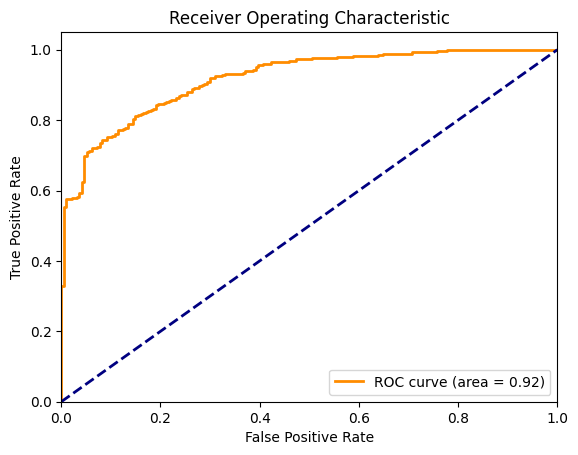

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [15]:
from joblib import dump

# Salvar o modelo em um arquivo .pkl
dump(modelo, 'modelo.pkl')


['modelo.pkl']

In [22]:
from google.colab import files
files.download('modelo.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import sklearn
print(sklearn.__version__)


1.2.2


In [20]:
# Selecionar amostras onde a variável worst é igual a 1 (vinho ruim)
ruins = arquivo.query('worst == 1')

# Selecionar amostras onde a variável worst é igual a 0 (vinho bom)
bons = arquivo.query('worst == 0')


In [21]:
bons.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,1,0
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,1,0
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1,0
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1,0
21,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.9912,3.17,0.35,11.0,1,0
